In [67]:
import pandas as pd

data = pd.read_csv('e-commerce_data.csv', encoding='ISO-8859-1')

In [68]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [69]:
data.drop(columns=['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID'], inplace=True)

In [70]:
data.describe()

,Description,Country
count,540455,541909
unique,4223,38
top,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,2369,495478


GridSpec(6, 1)

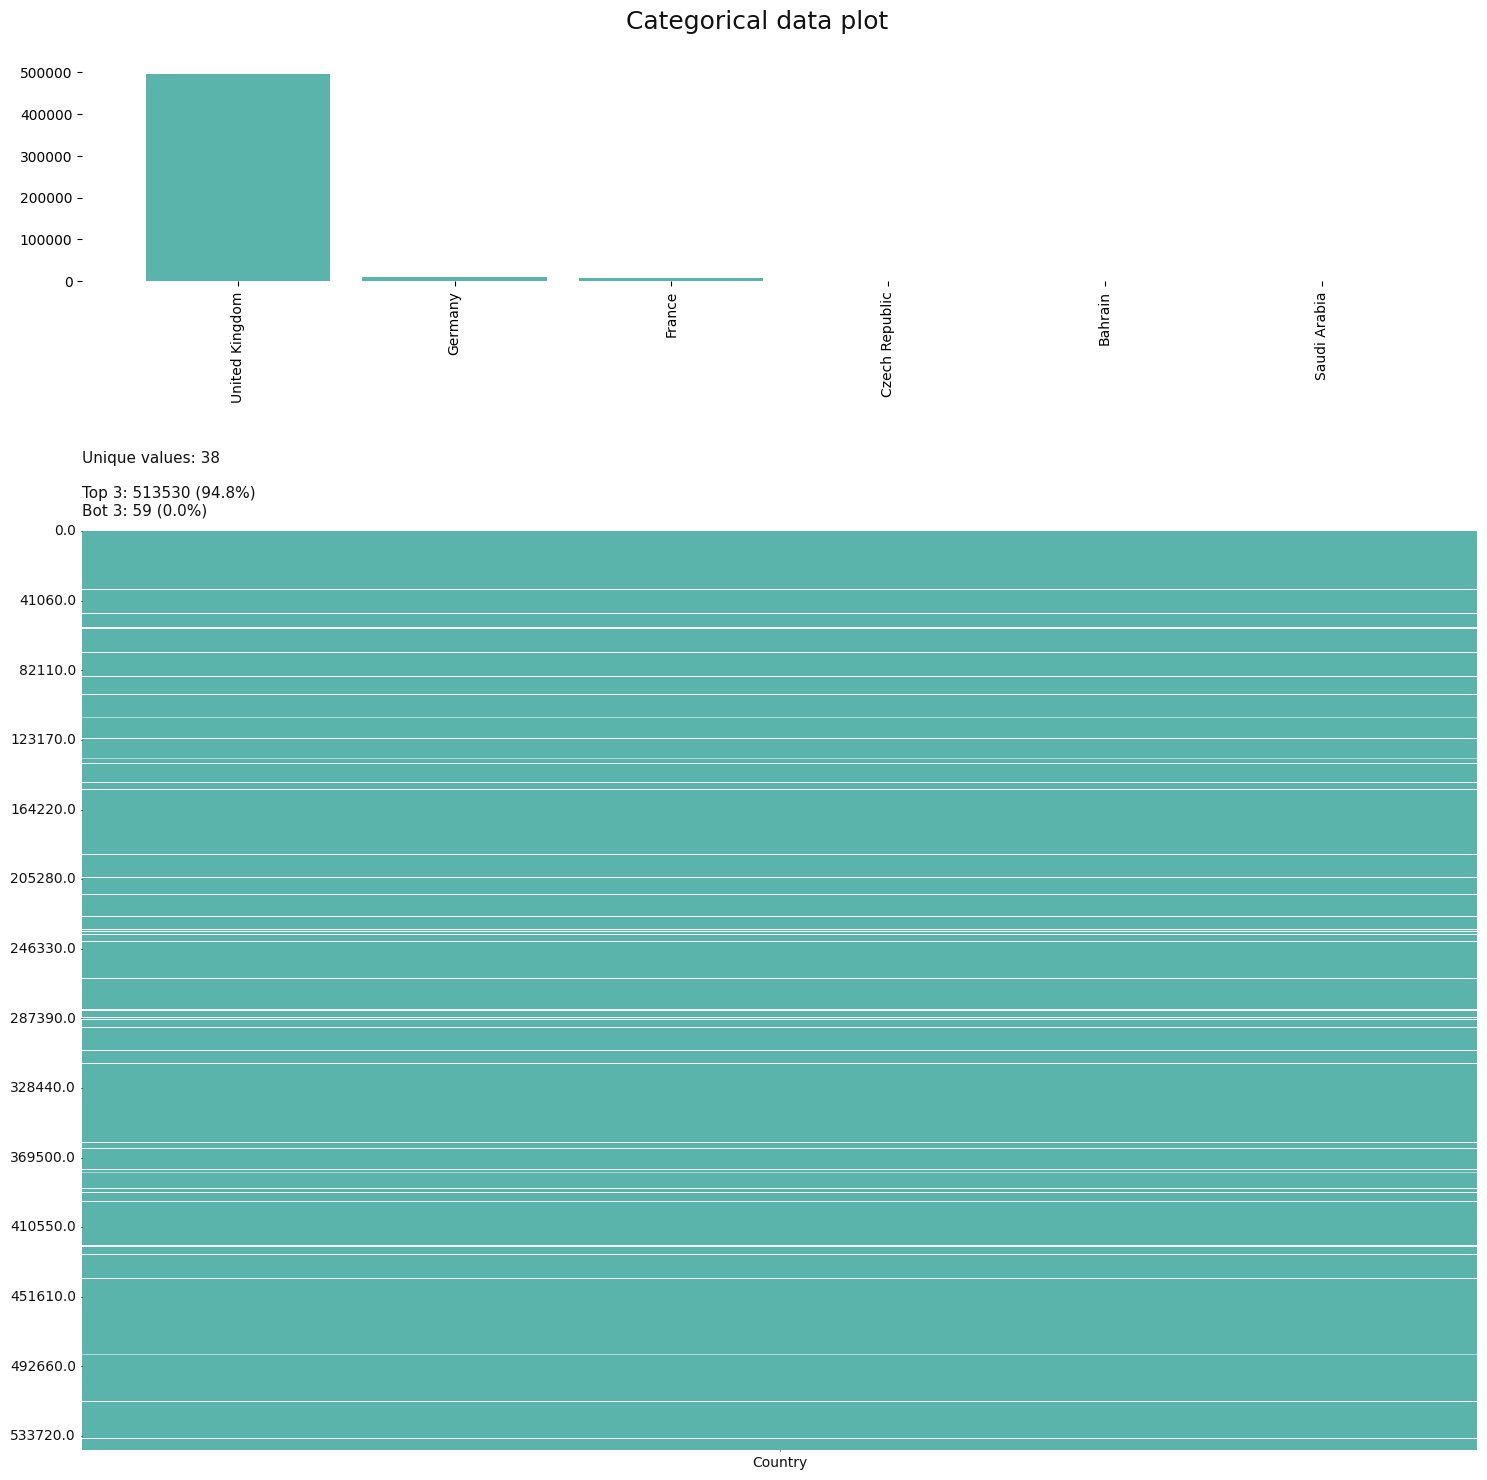

In [71]:
import klib
klib.cat_plot(data["Country"])

In [72]:
data['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [73]:
uk_data = data[data['Country'] == 'United Kingdom']
non_uk_data = data[data['Country'] != 'United Kingdom']

uk_sampled = uk_data.sample(n=10000, random_state=42)
data_undersampled = pd.concat([uk_sampled, non_uk_data], ignore_index=True)

In [74]:
data_undersampled['Country'].value_counts()

Country
United Kingdom          10000
Germany                  9495
France                   8557
EIRE                     8196
Spain                    2533
Netherlands              2371
Belgium                  2069
Switzerland              2002
Portugal                 1519
Australia                1259
Norway                   1086
Italy                     803
Channel Islands           758
Finland                   695
Cyprus                    622
Sweden                    462
Unspecified               446
Austria                   401
Denmark                   389
Japan                     358
Poland                    341
Israel                    297
USA                       291
Hong Kong                 288
Singapore                 229
Iceland                   182
Canada                    151
Greece                    146
Malta                     127
United Arab Emirates       68
European Community         61
RSA                        58
Lebanon                    45
Li

In [75]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

sw_nltk = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

irrelevant_words = ["set", "box", "pack", "large", "small", "medium", "mini", "design", "bundle"]

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[\d\W]+', ' ', text)
    for word in irrelevant_words:
        text = text.replace(word, '')
    words = [lemmatizer.lemmatize(word) for word in text.split() if word.lower() not in sw_nltk]
    new_text = " ".join(words)
    text = new_text.strip()
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tanmayshubhgarg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tanmayshubhgarg/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tanmayshubhgarg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [76]:
sample_descriptions = [
    "WHITE HANGING HEART T-LIGHT HOLDER",
    "HAND WARMER UNION JACK", 
    "ALARM CLOCK BAKELIKE RED",
    "SET/2 RED RETROSPOT TEA TOWELS"
]

for desc in sample_descriptions:
    print(f"Original: {desc}")
    print(f"Cleaned:  {clean_text(desc)}")
    print()

Original: WHITE HANGING HEART T-LIGHT HOLDER
Cleaned:  white hanging heart light holder

Original: HAND WARMER UNION JACK
Cleaned:  hand warmer union jack

Original: ALARM CLOCK BAKELIKE RED
Cleaned:  alarm clock bakelike red

Original: SET/2 RED RETROSPOT TEA TOWELS
Cleaned:  red retrospot tea towel



In [77]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_undersampled['Country_Encoded'] = label_encoder.fit_transform(data_undersampled['Country'])

In [78]:
data_undersampled.head()

,Description,Country,Country_Encoded
0,SMALL TALL CAMPHOR WOOD TOADSTOOL,United Kingdom,36
1,BUNDLE OF 3 SCHOOL EXERCISE BOOKS,United Kingdom,36
2,JUMBO BAG RED RETROSPOT,United Kingdom,36
3,TREASURE TIN GYMKHANA DESIGN,United Kingdom,36
4,PINK POLKADOT GARDEN PARASOL,United Kingdom,36


In [79]:
data_undersampled.drop(columns=['Country'], inplace=True)

In [80]:
data_undersampled.tail()

,Description,Country_Encoded
56426,PACK OF 20 SPACEBOY NAPKINS,13
56427,CHILDREN'S APRON DOLLY GIRL,13
56428,CHILDRENS CUTLERY DOLLY GIRL,13
56429,CHILDRENS CUTLERY CIRCUS PARADE,13
56430,BAKING SET 9 PIECE RETROSPOT,13


In [81]:
data_undersampled['description_cleaned'] = data_undersampled['Description'].apply(clean_text)

In [82]:
data_undersampled.drop(columns=['Description'], inplace=True)

In [83]:
data_undersampled.head(25)

,Country_Encoded,description_cleaned
0,36,tall camphor wood toadstool
1,36,school exercise book
2,36,jumbo bag red retrospot
3,36,treasure tin gymkhana
4,36,pink polkadot garden parasol
5,36,king choice tea caddy
6,36,cm christmas glass ball light
7,36,camouflage teddy
8,36,number tile vintage font
9,36,feather pen coal black


In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(data_undersampled['description_cleaned'])
y = data_undersampled['Country_Encoded']

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [97]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'predictions': y_pred
    }
    
    print(f"{name} Accuracy: {accuracy:.4f}")


Training Naive Bayes...
Naive Bayes Accuracy: 0.2706

Training Logistic Regression...
Logistic Regression Accuracy: 0.2762

Training Random Forest...
Random Forest Accuracy: 0.2633


In [98]:
# Find the best model
best_model_name = max(results.keys(), key=lambda k: results[k]['accuracy'])
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['predictions']

print(f"\nBest Model: {best_model_name}")
print(f"Best Accuracy: {results[best_model_name]['accuracy']:.4f}")

# Detailed classification report
print(f"\nClassification Report for {best_model_name}:")
print(classification_report(y_test, best_predictions, 
                          target_names=label_encoder.classes_))

# Confusion matrix
print(f"\nConfusion Matrix:")
cm = confusion_matrix(y_test, best_predictions)
print(cm)


Best Model: Logistic Regression
Best Accuracy: 0.2762

Classification Report for Logistic Regression:
                      precision    recall  f1-score   support

           Australia       0.00      0.00      0.00       252
             Austria       0.00      0.00      0.00        80
             Bahrain       0.00      0.00      0.00         4
             Belgium       0.33      0.00      0.00       414
              Brazil       0.00      0.00      0.00         6
              Canada       0.00      0.00      0.00        30
     Channel Islands       0.00      0.00      0.00       152
              Cyprus       0.00      0.00      0.00       124
      Czech Republic       0.00      0.00      0.00         6
             Denmark       0.00      0.00      0.00        78
                EIRE       0.27      0.35      0.31      1639
  European Community       0.00      0.00      0.00        12
             Finland       0.00      0.00      0.00       139
              France       0

/Users/tanmayshubhgarg/Documents/Projects/Camp2025/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tanmayshubhgarg/Documents/Projects/Camp2025/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tanmayshubhgarg/Documents/Projects/Camp2025/.venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

lb = LabelBinarizer()
y_train_onehot = lb.fit_transform(y_train)
y_test_onehot = lb.transform(y_test)

nn_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_dense.shape[1],)),
    Dense(256, activation='relu'),
    Dense(len(lb.classes_), activation='softmax')
])

nn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = nn_model.fit(
    X_train_dense, y_train_onehot,
    validation_data=(X_test_dense, y_test_onehot),
    epochs=32,
    batch_size=128,
    verbose=1
)

/Users/tanmayshubhgarg/Documents/Projects/Camp2025/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/64
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.2349 - loss: 2.5971 - val_accuracy: 0.2674 - val_loss: 2.4279
Epoch 2/64
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.2875 - loss: 2.3463 - val_accuracy: 0.2744 - val_loss: 2.4078
Epoch 3/64
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.2983 - loss: 2.2627 - val_accuracy: 0.2652 - val_loss: 2.4174
Epoch 4/64
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3037 - loss: 2.2035 - val_accuracy: 0.2685 - val_loss: 2.4176
Epoch 5/64
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3012 - loss: 2.1639 - val_accuracy: 0.2700 - val_loss: 2.4345
Epoch 6/64
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3127 - loss: 2.1276 - val_accuracy: 0.2654 - val_loss: 2.4524
Epoch 7/64
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.3111 - loss: 2.1135 - val_accuracy: 0.2655 - val_loss: 2.4806
Epoch 8/64
1411/1411 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3083 - loss: 2.0842 - 

In [101]:
test_loss, test_accuracy = nn_model.evaluate(X_test_dense, y_test_onehot, verbose=0)
nn_predictions = nn_model.predict(X_test_dense)

353/353 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [102]:
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 3.1784
Test Accuracy: 0.2652


In [103]:
# change from 36 classes to 2. european and non-european
data_undersampled['Country'] = label_encoder.inverse_transform(data_undersampled['Country_Encoded'])

In [104]:
data_undersampled['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [106]:
data_undersampled.drop(data_undersampled[data_undersampled['Country'] == 'Unspecified'].index, axis=0,inplace=True)

In [107]:
data_undersampled['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Brazil', 'USA', 'European Community',
       'Malta', 'RSA'], dtype=object)

In [108]:
European = ['United Kingdom', 'France', 'Netherlands', 'Germany', 'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Iceland', 'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria', 'Finland', 'Greece',
       'Czech Republic', 'European Community', 'Malta']

data_undersampled['European'] = data_undersampled['Country'].apply(lambda x: 'European' if x in European else 'Non-European')

GridSpec(6, 1)

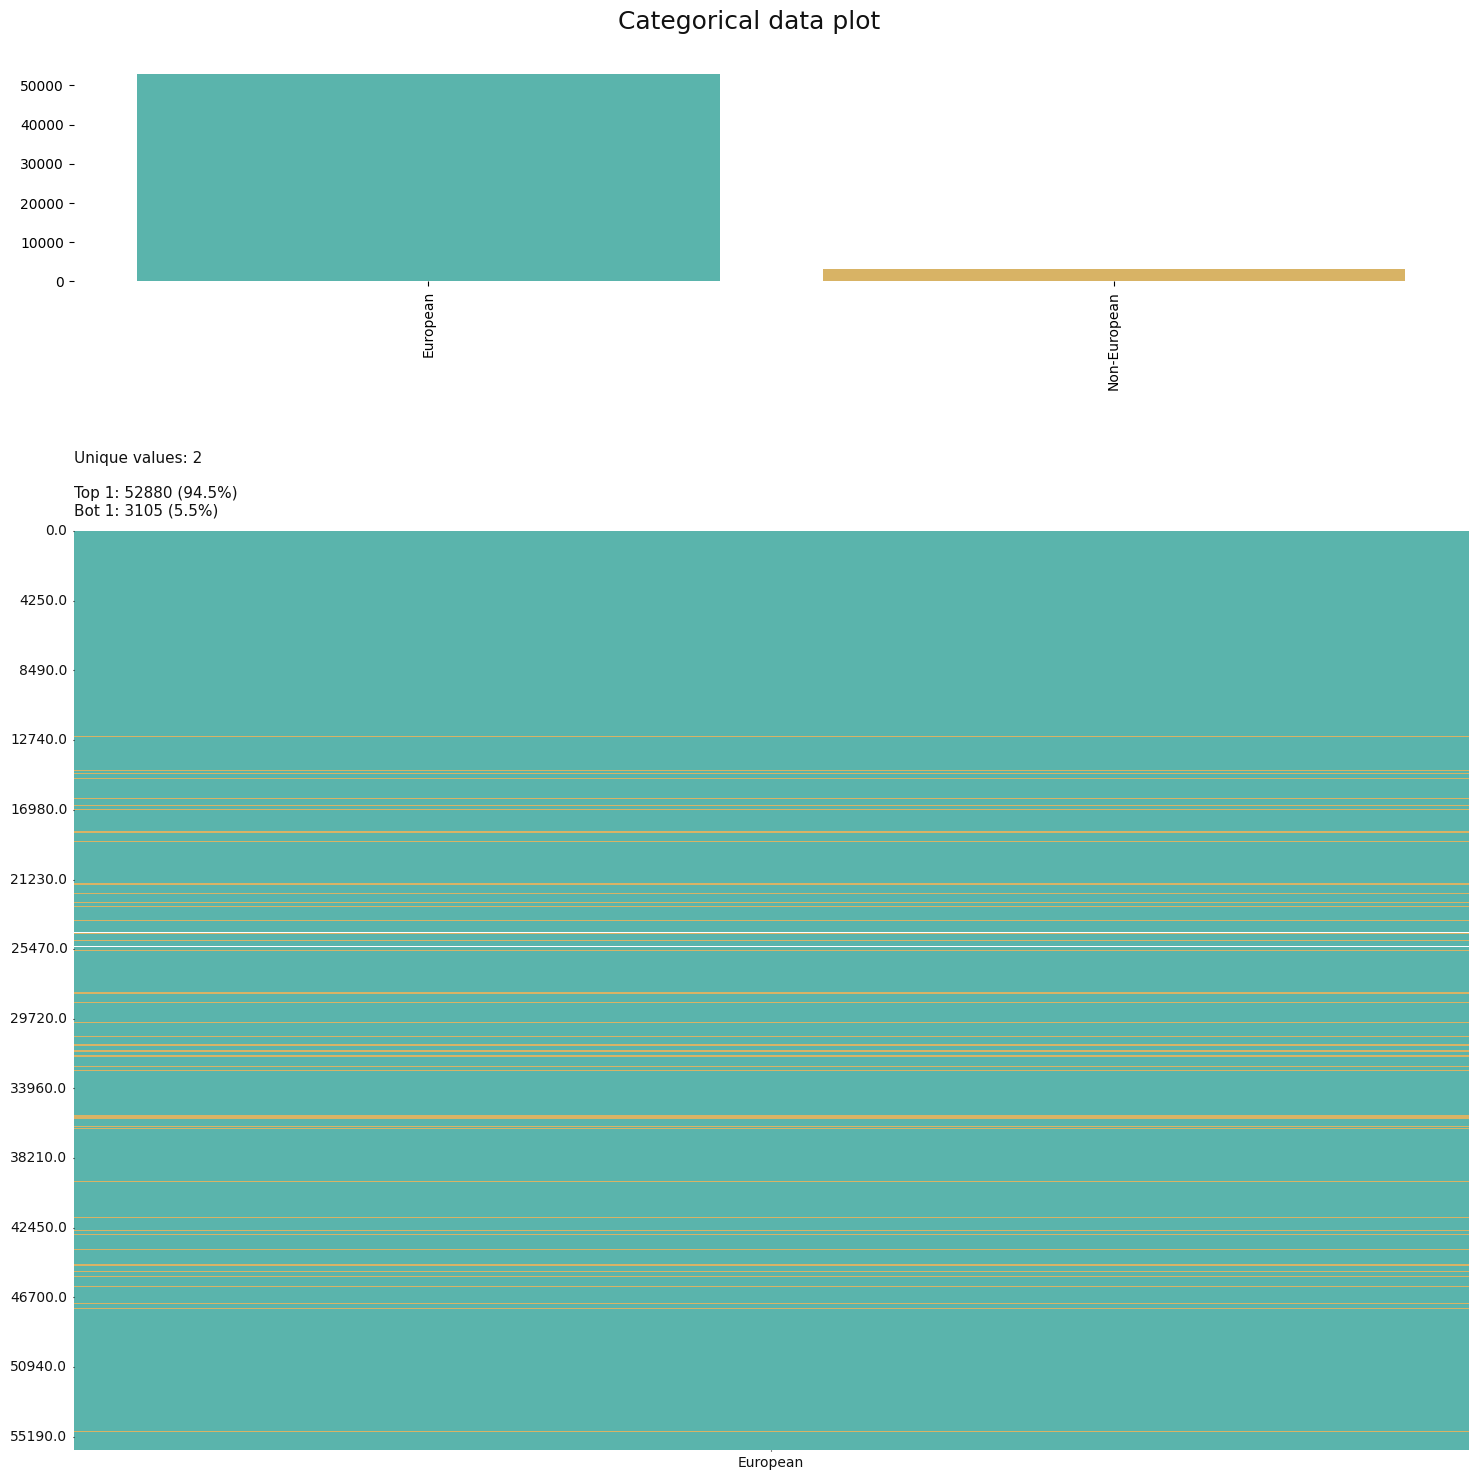

In [109]:
klib.cat_plot(data_undersampled["European"])

In [110]:
data_undersampled['European'].value_counts()

European
European        52880
Non-European     3105
Name: count, dtype: int64

In [117]:
new_data_undersampled = data_undersampled.copy()

euro_data = new_data_undersampled[new_data_undersampled['European'] == 'European']
non_euro_data = new_data_undersampled[new_data_undersampled['European'] == 'Non-European']

euro_sampled = euro_data.sample(n=3105, random_state=42)
new_data_undersampled = pd.concat([euro_sampled, non_euro_data], ignore_index=True)

In [118]:
new_data_undersampled['European'].value_counts()

European
European        3105
Non-European    3105
Name: count, dtype: int64

In [119]:
ndu = new_data_undersampled.copy()

In [120]:
ndu.head()

,Country_Encoded,description_cleaned,Country,European
0,13,feltcraft flower friend,France,European
1,27,grass hopper wooden wall clock,Portugal,European
2,10,jigsaw leap frog,EIRE,European
3,14,party cone candy tree decoration,Germany,European
4,36,christmas musical zinc star,United Kingdom,European


In [121]:
label_encoder = LabelEncoder()
ndu['European_Encoded'] = label_encoder.fit_transform(ndu['European'])
ndu.drop(columns=['Country', 'European', 'Country_Encoded'], inplace=True)

In [123]:
ndu.head()

,description_cleaned,European_Encoded
0,feltcraft flower friend,0
1,grass hopper wooden wall clock,0
2,jigsaw leap frog,0
3,party cone candy tree decoration,0
4,christmas musical zinc star,0


In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X = ndu['description_cleaned']
y = ndu['European_Encoded']

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [140]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'predictions': y_pred
    }
    
    print(f"{name} Accuracy: {accuracy:.4f}")


Training Naive Bayes...
Naive Bayes Accuracy: 0.6135

Training Logistic Regression...
Logistic Regression Accuracy: 0.6079

Training Random Forest...
Random Forest Accuracy: 0.6111


In [141]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# For binary classification, we can use the labels directly (0 or 1)
# No need for one-hot encoding with LabelBinarizer for binary classification

print(f"Original y_train shape: {y_train.shape}")
print(f"y_train unique values: {y_train.unique()}")
print(f"X_train_dense shape: {X_train_dense.shape}")
print(f"X_test_dense shape: {X_test_dense.shape}")

# Create binary classification model
new_nn_model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_dense.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Single output neuron for binary classification
])

new_nn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',  # Use binary crossentropy for binary classification
    metrics=['accuracy']
)

print(f"\nModel architecture:")
new_nn_model.summary()

new_history = new_nn_model.fit(
    X_train_dense, y_train,  # Use original y_train, not one-hot encoded
    validation_data=(X_test_dense, y_test),  # Use original y_test, not one-hot encoded
    epochs=20,  # Reduced epochs for faster training
    batch_size=128,
    verbose=1
)

Original y_train shape: (4968,)
y_train unique values: [0 1]
X_train_dense shape: (4968, 1087)
X_test_dense shape: (1242, 1087)

Model architecture:


/Users/tanmayshubhgarg/Documents/Projects/Camp2025/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 512)            │       557,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 688,641 (2.63 MB)

 Trainable params: 688,641 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5233 - loss: 0.6907 - val_accuracy: 0.6014 - val_loss: 0.6742
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5233 - loss: 0.6907 - val_accuracy: 0.6014 - val_loss: 0.6742
Epoch 2/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6600 - loss: 0.6463 - val_accuracy: 0.6127 - val_loss: 0.6512
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6600 - loss: 0.6463 - val_accuracy: 0.6127 - val_loss: 0.6512
Epoch 3/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6889 - loss: 0.5914 - val_accuracy: 0.6192 - val_loss: 0.6594
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6889 - loss: 0.5914 - val_accuracy: 0.6192 - val_loss: 0.6594
Epoch 4/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7248 - loss: 0.5501 - val_accuracy: 0.6192 - val_loss: 0.6776
Epoch 5/20
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7248 - loss: 0.5501 - val_accuracy: 0.6192 - val_los

In [142]:
# Evaluate the binary classification model
test_loss, test_accuracy = new_nn_model.evaluate(X_test_dense, y_test, verbose=0)
print(f"Binary Classification Neural Network:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Get predictions
nn_predictions = new_nn_model.predict(X_test_dense, verbose=0)
nn_predictions_binary = (nn_predictions > 0.5).astype(int).flatten()

print(f"\nDetailed Classification Report:")
print(classification_report(y_test, nn_predictions_binary, 
                          target_names=['Non-European', 'European']))

print(f"\nConfusion Matrix:")
cm_nn = confusion_matrix(y_test, nn_predictions_binary)
print(cm_nn)

Binary Classification Neural Network:
Test Loss: 0.8959
Test Accuracy: 0.6143

Detailed Classification Report:
              precision    recall  f1-score   support

Non-European       0.67      0.50      0.57       639
    European       0.58      0.73      0.65       603

    accuracy                           0.61      1242
   macro avg       0.62      0.62      0.61      1242
weighted avg       0.63      0.61      0.61      1242


Confusion Matrix:
[[320 319]
 [160 443]]
